In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve


In [2]:
df=pd.read_csv("Book1.csv")
df = df.drop(columns=['Id'])
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
X=df
y=df['Cover_Type']

# Preprocessing

In [4]:
X['Distance_to_Hydrolody'] = np.sqrt(X['Horizontal_Distance_To_Hydrology']**2 + X['Vertical_Distance_To_Hydrology']**2)
X = X.drop(columns = ['Soil_Type7', 'Soil_Type15'])

In [5]:
from scipy import stats

X[(np.abs(stats.zscore(X)) < 3).all(axis = 1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_to_Hydrolody
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,2,323.817850
35,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,2,242.825040
41,2570,346,2,0,0,331,215,235,158,5745,...,0,0,0,0,0,0,0,0,2,0.000000
61,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,2,42.579338
67,2919,13,13,90,6,5321,207,214,142,4060,...,0,0,0,0,0,0,0,0,1,90.199778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488234,3274,193,16,331,86,1295,217,251,163,2742,...,0,0,0,0,0,0,0,0,1,341.989766
488235,3277,188,18,330,89,1266,219,250,159,2717,...,0,0,0,0,0,0,0,0,1,341.790872
488236,3277,175,18,330,89,1237,227,246,144,2691,...,0,0,0,0,0,0,0,0,1,341.790872
488237,3275,168,19,331,87,1208,231,244,136,2665,...,0,0,0,0,0,0,0,0,1,342.242604


In [6]:
X['Hillshade'] = X['Hillshade_9am'] + X['Hillshade_3pm'] + X['Hillshade_Noon']

In [7]:
import math

X['binned_elev'] = [math.floor(v/50.0) for v in X['Elevation']]

In [8]:
X['Elevation_Fire_Points'] = X['Elevation'] + X['Horizontal_Distance_To_Fire_Points']

In [9]:
X['Road_plus_Fire'] = X['Horizontal_Distance_To_Roadways'] + X['Horizontal_Distance_To_Fire_Points']

In [10]:
scalar = StandardScaler()

num_data = X[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",'Distance_to_Hydrolody','Hillshade','binned_elev','Elevation_Fire_Points','Road_plus_Fire']]

cat_data = X.drop(["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",'Distance_to_Hydrolody','Hillshade','binned_elev','Elevation_Fire_Points','Road_plus_Fire'],axis=1)

scaled_data = scalar.fit_transform(num_data)

num_data_scaled = pd.DataFrame(scaled_data, columns=num_data.columns)

#X_train_scaled = pd.concat([num_data_train_scaled,cat_data_train],axis=1)
#X_test_scaled = pd.concat([num_data_test_scaled,cat_data_test],axis=1)
X_scaled = pd.concat([num_data_scaled.reset_index(drop=True), cat_data.reset_index(drop=True)], axis=1)

X_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,3.246283,0.330743,0.439143,0.142960,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,3.205504,0.293388,0.590899,0.221342,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,3.126965,0.816364,0.742654,-0.196691,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,3.194931,0.965786,0.742654,-0.536343,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,3.165479,0.293388,0.540313,0.195215,...,0,0,0,0,0,0,0,0,0,5


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Accuracy before PCA

In [13]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost Classifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)

AdaBoost Accuracy: 0.886999475056582


# Hyperparameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create the HMM model
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
# Predict hidden states for the test set
hidden_states = best_model.predict(X_test)
# Evaluate the accuracy
accuracy = accuracy_score(y_test, hidden_states)
print(f"Accuracy: {accuracy}")


Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy: 1.0


# Visualization before PCA

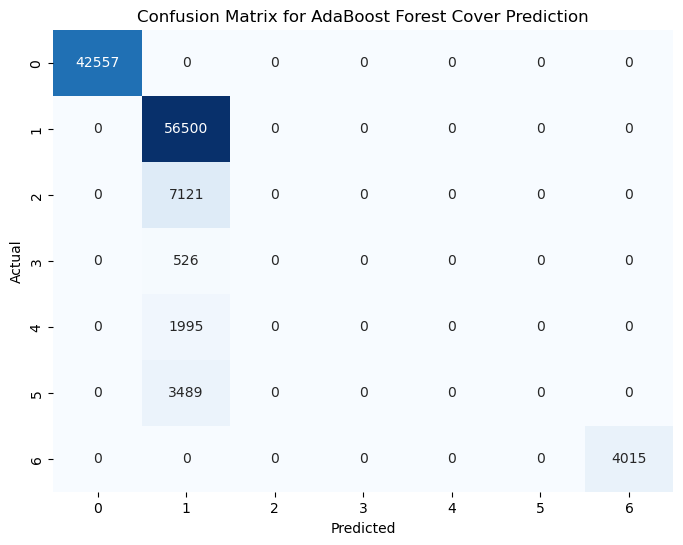

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Forest Cover Prediction')
plt.show()

In [16]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred_adaboost)

# Display classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     42557
           2       0.81      1.00      0.90     56500
           3       0.00      0.00      0.00      7121
           4       0.00      0.00      0.00       526
           5       0.00      0.00      0.00      1995
           6       0.00      0.00      0.00      3489
           7       1.00      1.00      1.00      4015

    accuracy                           0.89    116203
   macro avg       0.40      0.43      0.41    116203
weighted avg       0.80      0.89      0.84    116203



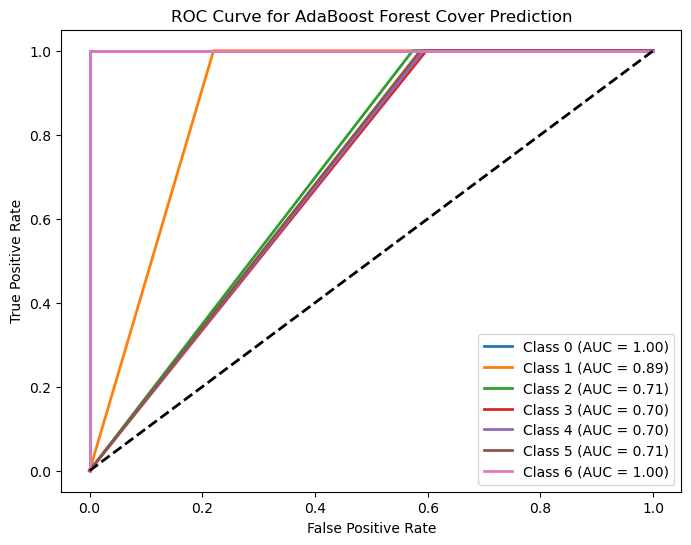

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming X_train_pca and y_train_pca are defined
# Assuming adaboost_classifier is your AdaBoost model

# Train the AdaBoost model
adaboost_classifier.fit(X_train, y_train)

# Binarize the output
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get ROC curve for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], adaboost_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Forest Cover Prediction')
plt.legend(loc='lower right')
plt.show()


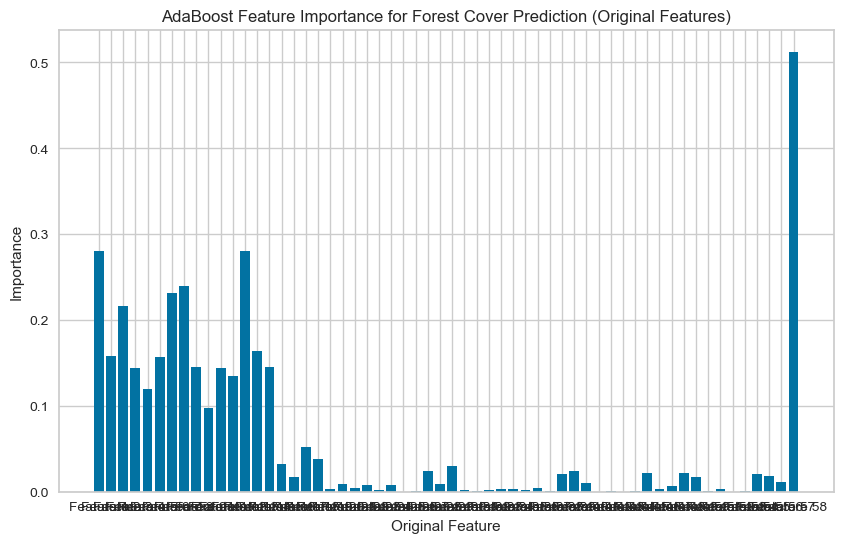

In [37]:
# Assuming adaboost_classifier is your trained AdaBoost model
# Assuming pca is your fitted PCA model

# Get the original feature importances
original_feature_importance = np.zeros(X_train.shape[1])

for idx, component in enumerate(pca.components_):
    original_feature_importance += feature_importance[idx] * np.abs(component)

# Plotting feature importance for original features
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), original_feature_importance, align="center")
plt.xticks(range(X_train.shape[1]), [f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.xlabel("Original Feature")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importance for Forest Cover Prediction (Original Features)")
plt.show()

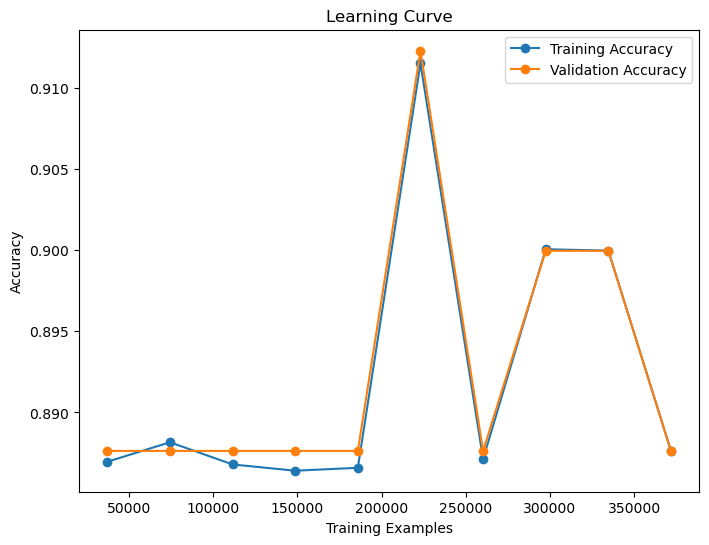

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# PCA

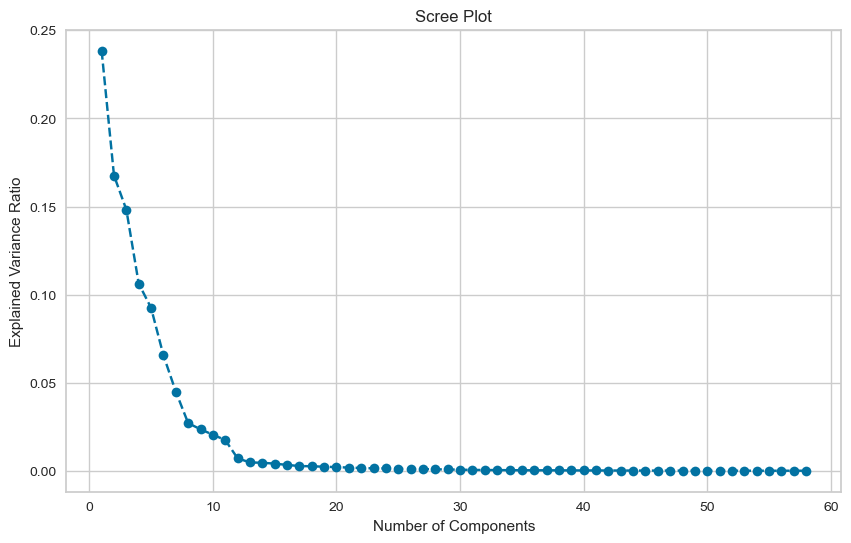

The optimal number of components is: 7


In [20]:
pca = PCA()
pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()
threshold = 0.05
num_components = np.argmax(explained_variance_ratio < threshold) + 1
print(f'The optimal number of components is: {num_components}')

In [21]:
pca=PCA(n_components=num_components)
X_pca=pca.fit_transform(X_scaled)
print(X_pca)

[[-0.95053665  1.47920123 -1.75204004 ... -2.10882147 -1.9246748
   2.2812346 ]
 [-0.91887769  1.29249519 -2.09095085 ... -2.17112587 -1.87501121
   2.35533386]
 [-3.13919803  1.75616963 -1.11832667 ... -0.13107908 -1.9867181
   1.01283789]
 ...
 [ 3.31490846 -0.97105448 -1.93188549 ... -1.39014932 -1.35534007
   0.13161816]
 [ 3.0950435  -1.44252268 -2.08872287 ... -1.43430724 -1.4338059
   0.16204315]
 [ 3.06113163 -1.36549319 -2.13357525 ... -1.54938114 -1.48190685
   0.16620101]]


In [22]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['Output'] = df['Cover_Type']

In [23]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Output
0,-0.950537,1.479201,-1.752040,4.128565,-2.108821,-1.924675,2.281235,5
1,-0.918878,1.292495,-2.090951,4.047097,-2.171126,-1.875011,2.355334,5
2,-3.139198,1.756170,-1.118327,2.543329,-0.131079,-1.986718,1.012838,2
3,-2.652666,2.057129,-0.519027,2.810330,0.383771,-1.944030,0.980215,2
4,-0.788063,1.386710,-2.311270,3.990572,-2.118097,-1.733038,2.353385,5


In [24]:
X_pca=pca_df.drop("Output",axis=1)
y_pca=pca_df["Output"]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42
)

# Check the shape of the resulting sets
(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

((464809, 7), (116203, 7), (464809,), (116203,))

# Accuracy after PCA

In [25]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_classifier.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred_adaboost = adaboost_classifier.predict(X_test_pca)

# Evaluate the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(y_test_pca, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)


AdaBoost Accuracy: 0.6359474368131631


# Visualization after PCA

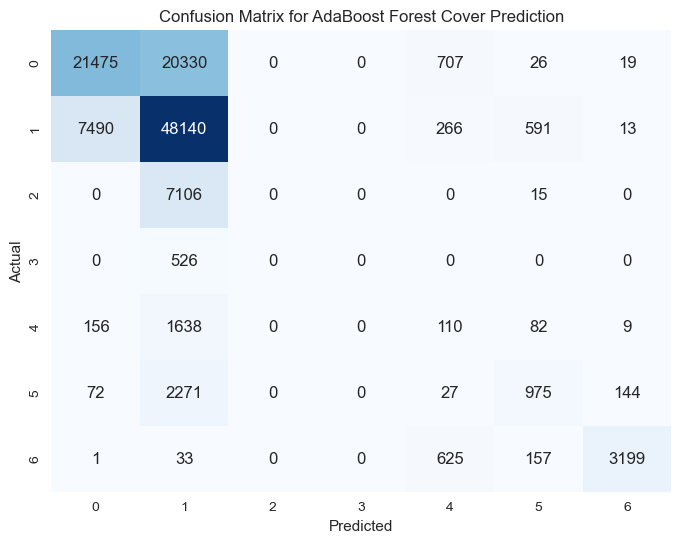

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_adaboost)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Forest Cover Prediction')
plt.show()


In [27]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test_pca, y_pred_adaboost)

# Display classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.50      0.60     42557
           2       0.60      0.85      0.71     56500
           3       0.00      0.00      0.00      7121
           4       0.00      0.00      0.00       526
           5       0.06      0.06      0.06      1995
           6       0.53      0.28      0.37      3489
           7       0.95      0.80      0.86      4015

    accuracy                           0.64    116203
   macro avg       0.41      0.36      0.37    116203
weighted avg       0.61      0.64      0.60    116203



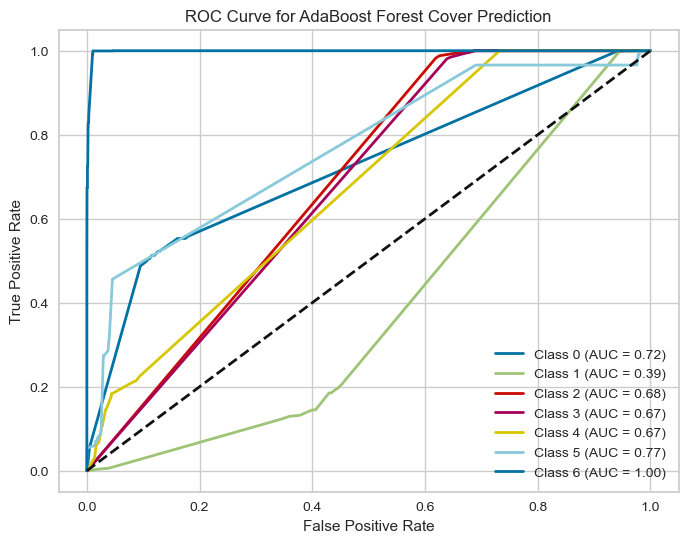

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Assuming X_train_pca and y_train_pca are defined
# Assuming adaboost_classifier is your AdaBoost model

# Train the AdaBoost model
adaboost_classifier.fit(X_train_pca, y_train_pca)

# Binarize the output
y_bin = label_binarize(y_test_pca, classes=np.unique(y_test_pca))

# Get ROC curve for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], adaboost_classifier.predict_proba(X_test_pca)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost Forest Cover Prediction')
plt.legend(loc='lower right')
plt.show()


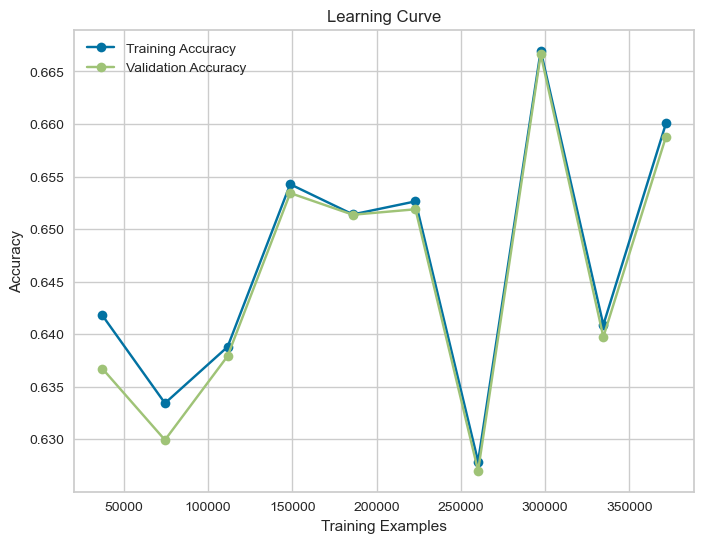

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    adaboost_classifier, X_train_pca, y_train_pca, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()